In [2]:
import sys
sys.path.insert(1, f'../corrections/exercices')

In [3]:
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import PandasTools
PandasTools.RenderImagesInAllDataFrames(images=False)
from rdkit.Chem.Draw import IPythonConsole #Needed to show molecules
from IPython import display
import matplotlib.pyplot as plt 
import prince

,ID,ROMol,availability_type,chirality,first_approval,first_in_class,inorganic_flag,molecule_type,natural_product,oral,parenteral,pref_name,topical
0,CHEMBL2,,1,2,1976.0,0,0,Small molecule,0,True,False,PRAZOSIN,False
1,CHEMBL266459,,-2,2,1980.0,0,0,Small molecule,0,False,False,ZOMEPIRAC SODIUM,False
2,CHEMBL3,,2,1,1984.0,0,0,Small molecule,1,True,False,NICOTINE,True
3,CHEMBL4,,1,0,1990.0,0,0,Small molecule,0,True,True,OFLOXACIN,True
4,CHEMBL5,,0,2,1964.0,0,0,Small molecule,0,True,False,NALIDIXIC ACID,False

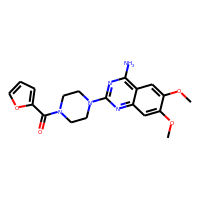
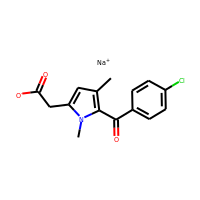
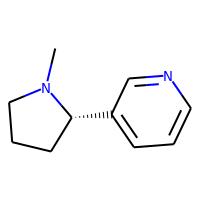
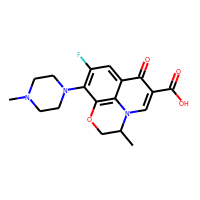
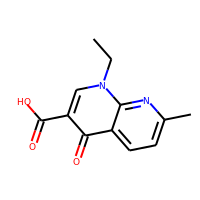

In [4]:
#Load the sdf from approved drugs download on chembl
df_meds = PandasTools.LoadSDF('./data/meds.sdf', isomericSmiles=True)
df_meds = df_meds.drop(columns=['molecule_synonyms']) #remove annoying column
df_meds.head()

In [5]:
#First let's look what we have
print(len(df_meds))
df_meds['molecule_type'].value_counts()

3371


Small molecule     3277
Protein              73
Unknown              17
Oligonucleotide       2
Oligosaccharide       2
Name: molecule_type, dtype: int64

,ID,ROMol,availability_type,chirality,first_approval,first_in_class,inorganic_flag,molecule_type,natural_product,oral,parenteral,pref_name,topical
1947,CHEMBL1200644,,1,1,2001.0,0,0,Oligosaccharide,0,False,True,FONDAPARINUX SODIUM,False
2356,CHEMBL1201202,,1,1,2001.0,0,0,Oligosaccharide,0,False,True,FONDAPARINUX,False

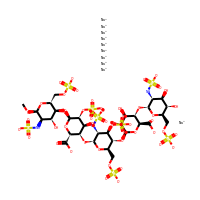
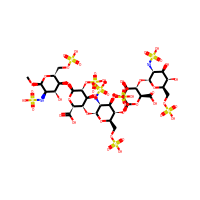

In [6]:
#Watch a category
df_meds[df_meds.molecule_type == 'Oligosaccharide']

In [7]:
#On garde seulement une catégorie
df_meds = df_meds[df_meds['molecule_type'] == 'Small molecule']

In [8]:
from PCA import exo_number_frags

../corrections/exercices/PCA.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_PCA.dropna(subset = ['first_approval'], inplace=True)
../corrections/exercices/PCA.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_PCA['first_approval'] = df_PCA['first_approval'].astype(float)


In [9]:
exo_number_frags.example()

GridBox(children=(HTML(value='<span style="font-size:medium;"\'>arguments</span>', _dom_classes=('header',)), …

In [10]:
def number_frags(df):
    Lnumber_mol = []
    for mol in df['ROMol']:
        Lnumber_mol.append(len(Chem.rdmolops.GetMolFrags(mol)))
    return Lnumber_mol

In [11]:
# one liner and faster

def number_frags(df):
    return [len(Chem.rdmolops.GetMolFrags(mol)) for mol in df['ROMol']]

In [12]:
exo_number_frags.correction(number_frags)

GridBox(children=(HTML(value='<span style="font-size:medium;"\'>arguments</span>', _dom_classes=('header', '')…

,ID,ROMol,availability_type,chirality,first_approval,first_in_class,inorganic_flag,molecule_type,natural_product,oral,parenteral,pref_name,topical,Mixture
0,CHEMBL2,,1,2,1976.0,0,0,Small molecule,0,True,False,PRAZOSIN,False,1
1,CHEMBL266459,,-2,2,1980.0,0,0,Small molecule,0,False,False,ZOMEPIRAC SODIUM,False,2
2,CHEMBL3,,2,1,1984.0,0,0,Small molecule,1,True,False,NICOTINE,True,1
3,CHEMBL4,,1,0,1990.0,0,0,Small molecule,0,True,True,OFLOXACIN,True,1
4,CHEMBL5,,0,2,1964.0,0,0,Small molecule,0,True,False,NALIDIXIC ACID,False,1

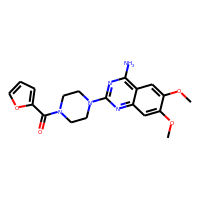
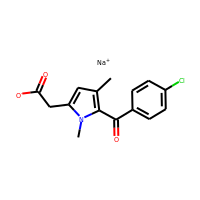
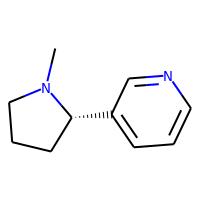
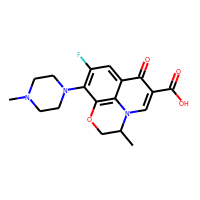
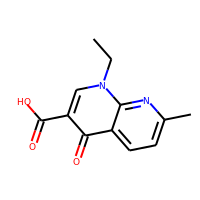

In [13]:
PandasTools.ChangeMoleculeRendering(renderer='Images')
df_meds['Mixture'] = number_frags(df_meds)
df_meds.head()

In [14]:
df_meds['Mixture'].value_counts()

1     2115
2      890
3      199
4       31
5       17
7        7
8        5
6        4
9        3
49       1
29       1
25       1
13       1
48       1
10       1
Name: Mixture, dtype: int64

In [15]:
df_meds = df_meds[df_meds['Mixture'] == 1]
len(df_meds)

2115

In [16]:
#On regarde les dates de sorties
df_meds['first_approval'].value_counts()

nan       626
1982.0    109
1996.0     47
1997.0     37
1985.0     36
1999.0     35
2015.0     32
1995.0     30
2014.0     30
1991.0     29
1992.0     29
1986.0     27
1984.0     26
1981.0     26
2001.0     26
2009.0     25
1974.0     25
2004.0     24
1959.0     24
2011.0     24
2000.0     23
2012.0     23
2008.0     23
1993.0     23
1998.0     23
1960.0     23
1990.0     22
1979.0     22
2006.0     22
2013.0     21
         ... 
2016.0     15
2005.0     14
1955.0     14
1962.0     14
1971.0     14
1980.0     13
1975.0     13
1970.0     12
1972.0     12
1969.0     12
1956.0     12
1951.0     11
1954.0     10
1958.0     10
1952.0      9
1963.0      9
1946.0      8
1968.0      8
1966.0      7
1949.0      7
2017.0      6
1948.0      6
1945.0      5
1939.0      5
1947.0      4
1943.0      3
1941.0      2
1944.0      1
1940.0      1
1942.0      1
Name: first_approval, Length: 80, dtype: int64

In [17]:
df_meds.dropna(subset = ['first_approval'], inplace=True)
df_meds['first_approval'] = df_meds['first_approval'].astype(float)

In [18]:
df_meds = df_meds[df_meds['first_approval'] >= 2000]
len(df_meds)

383

In [19]:
df_meds['natural_product'].value_counts()

0    289
1     94
Name: natural_product, dtype: int64

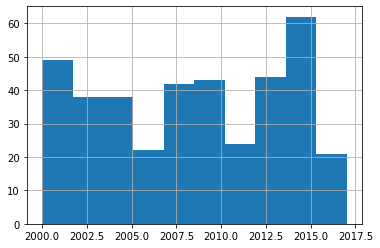

In [20]:
%matplotlib inline

#On peut regarder sous forme d'histogramme
df_meds['first_approval'].hist();


In [21]:
#On garde seulement les colonnes nécessaire pour l'ACP : 'ID', 'natural_product', 'ROMol'
df_PCA = df_meds[['ID', 'natural_product', 'ROMol']]

### Calculating our descriptors 

In [22]:
#RDKIT Descriptors 
from rdkit.Chem import Descriptors, rdMolDescriptors, Lipinski

#### Liste des descripteurs : 
#### [MW, LogP, TPSA, LabuteASA, HBA, HBD, FCSP3, MQN8, MQN10, NAR, NRB]

In [23]:
import importlib
importlib.reload(sys.modules['PCA'])

<module 'PCA' from '../corrections/exercices/PCA.py'>

In [24]:
from PCA import exo_df_descriptors

In [25]:
exo_df_descriptors.example()

GridBox(children=(HTML(value='<span style="font-size:medium;"\'>arguments</span>', _dom_classes=('header',)), …

In [26]:
def df_descriptors(df):
    Lmol = df['ROMol']
    Ldescriptors = []
    for m in Lmol:
        
        # Calculer les propriétés chimiques
        MW = round(Descriptors.ExactMolWt(m), 1)
        LogP = round(Descriptors.MolLogP(m), 1)
        TPSA = round(Descriptors.TPSA(m), 1)
        LabuteASA = round(Descriptors.LabuteASA(m), 1)
        HBA = Descriptors.NumHAcceptors(m)
        HBD = Descriptors.NumHDonors(m)
        FCSP3 = Lipinski.FractionCSP3(m)
        MQN8 = rdMolDescriptors.MQNs_(m)[7]
        MQN10 = rdMolDescriptors.MQNs_(m)[9]
        NAR = Lipinski.NumAromaticRings(m)
        NRB = Chem.Descriptors.NumRotatableBonds(m)
        
        Ldescriptors.append([MW, LogP, TPSA, LabuteASA, HBA, HBD, FCSP3, MQN8, MQN10, NAR, NRB])
            
    # Create pandas row for conditions results with values and information whether rule of five is violated
    prop_df = pd.DataFrame(Ldescriptors)
    prop_df.columns = ['MW', 'HBA', 'HBD', 'LogP', 'rule_of_five_conform']
    df = df.join(prop_df)
    
    return df

In [27]:
# Version plus rapide

def df_descriptors(df):
    Lmol = df['ROMol']
    Ldescriptors = []
    for m in Lmol:
        
        # Calculer les propriétés chimiques
        MW = round(Descriptors.ExactMolWt(m), 1)
        LogP = round(Descriptors.MolLogP(m), 1)
        TPSA = round(Descriptors.TPSA(m), 1)
        LabuteASA = round(Descriptors.LabuteASA(m), 1)
        HBA = Descriptors.NumHAcceptors(m)
        HBD = Descriptors.NumHDonors(m)
        FCSP3 = Lipinski.FractionCSP3(m)
        MQN8 = rdMolDescriptors.MQNs_(m)[7]
        MQN10 = rdMolDescriptors.MQNs_(m)[9]
        NAR = Lipinski.NumAromaticRings(m)
        NRB = Chem.Descriptors.NumRotatableBonds(m)
        
        Ldescriptors.append([MW, LogP, TPSA, LabuteASA, HBA, HBD, FCSP3, MQN8, MQN10, NAR, NRB])
        
    # Create pandas row for conditions results with values and information whether rule of five is violated
    for column_name,values in zip(['MW', 'LogP', 'TPSA', 'LabuteASA', 'HBA','HBD', 'FCSP3', 'MQN8', 'MQN10', 'NAR', 'NRB'],zip(*Ldescriptors)):
        df[column_name] = values
    
    return df

In [28]:
exo_df_descriptors.correction(df_descriptors)

GridBox(children=(HTML(value='<span style="font-size:medium;"\'>arguments</span>', _dom_classes=('header', '')…

In [29]:
df_PCA = df_descriptors(df_PCA)

# # same goal, using .map and lamba function
# df_PCA['MW'] = df_PCA.ROMol.map(lambda m: round(Chem.Descriptors.ExactMolWt(m), 1))
# df_PCA['LogP'] = df_PCA.ROMol.map(lambda m: round(Chem.Descriptors.MolLogP(m), 1))
# df_PCA['TPSA'] = df_PCA.ROMol.map(lambda m: round(Chem.Descriptors.TPSA(m), 1))
# df_PCA['LabuteASA'] = df_PCA.ROMol.map(lambda m: round(Chem.Descriptors.LabuteASA(m), 1))
# df_PCA['HBA'] = df_PCA.ROMol.map(lambda m: Chem.Descriptors.NumHAcceptors(m))
# df_PCA['HBD'] = df_PCA.ROMol.map(lambda m: Chem.Descriptors.NumHDonors(m))
# df_PCA['FCSP3'] = df_PCA.ROMol.map(lambda m: Lipinski.FractionCSP3(m))
# df_PCA['MQN8'] = df_PCA.ROMol.map(lambda m: rdMolDescriptors.MQNs_(m)[7])
# df_PCA['MQN10'] = df_PCA.ROMol.map(lambda m: rdMolDescriptors.MQNs_(m)[9])
# df_PCA['NAR'] = df_PCA.ROMol.map(lambda m: Lipinski.NumAromaticRings(m))
# df_PCA['NRB'] = df_PCA.ROMol.map(lambda m: Chem.Descriptors.NumRotatableBonds(m))

/home/pierre-yvesad/anaconda3/envs/test_teachopencadd/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [30]:
df_PCA.head()

,ID,natural_product,ROMol,MW,LogP,TPSA,LabuteASA,HBA,HBD,FCSP3,MQN8,MQN10,NAR,NRB
58,CHEMBL430,0,,389.1,1.0,123.0,158.7,8,2,0.444444,2,4,2,5
105,CHEMBL53,1,,267.1,2.8,43.7,117.6,3,2,0.294118,0,2,2,0
143,CHEMBL494,1,,360.2,3.5,77.8,156.6,3,3,0.681818,0,4,0,8
183,CHEMBL98,0,,264.1,2.5,78.4,112.5,3,3,0.428571,2,3,1,8
202,CHEMBL535,0,,398.2,3.3,77.2,169.7,3,3,0.363636,2,2,2,7


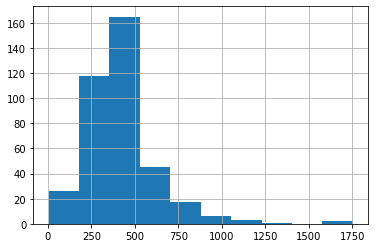

In [31]:
#Distribution des MWs

%matplotlib inline
df_PCA.MW.hist();

In [32]:
#Pas au dessus de 700 et en dessous de 200 
df_PCA = df_PCA[df_PCA['MW'].between(200, 700)]
len(df_PCA)

318

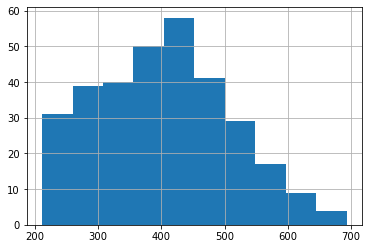

In [33]:
df_PCA.MW.hist();

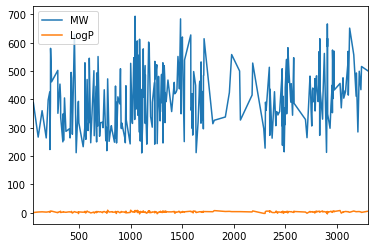

In [34]:
#On peut regarder la projection des molécules selon différentes variables 
df_PCA[['MW', 'LogP']].plot();

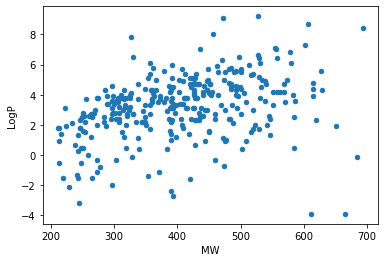

In [35]:
df_PCA.plot(x='MW', y='LogP', kind='scatter');

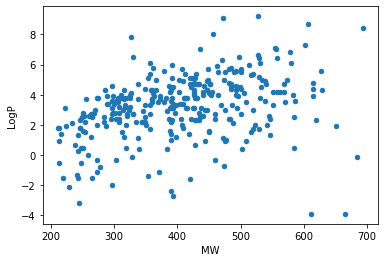

In [36]:
df_PCA.plot.scatter(x='MW', y='LogP');

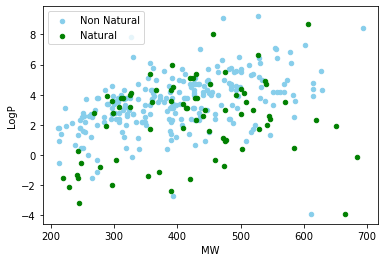

In [37]:
ax = df_PCA[df_PCA['natural_product'] == '0'].plot.scatter(x='MW', y='LogP', color='skyblue', label='Non Natural')
df_PCA[df_PCA['natural_product'] == '1'].plot.scatter(x='MW', y='LogP', color='Green', label='Natural', ax=ax);

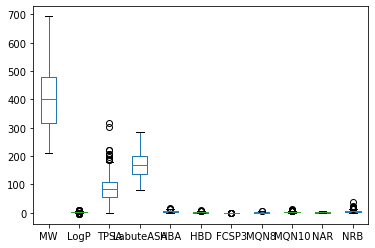

In [38]:
#on peut regarder les valeurs des différents descripteurs 
df_PCA.plot.box();

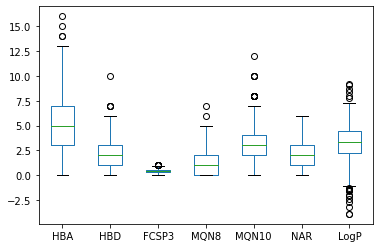

In [39]:
#Sans prendre en compte les valeurs trop grandes
x = list(range(7,13))
x.append(4)

df_PCA.iloc[:, x].plot.box();

/home/pierre-yvesad/anaconda3/envs/test_teachopencadd/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


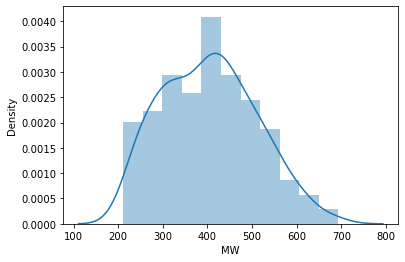

In [40]:
#La librairie seaborn peut-être plus adaptée pour les graphiques 
import seaborn as sns

sns.distplot(df_PCA.MW,);

/home/pierre-yvesad/anaconda3/envs/test_teachopencadd/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


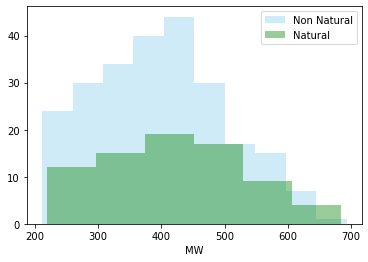

In [41]:
#On peut regarder la distribution sur le même graphique selon la catégorie
sns.distplot(df_PCA[df_PCA['natural_product'] == '0']['MW'] , color="skyblue", label="Non Natural", kde=False)
sns.distplot(df_PCA[df_PCA['natural_product'] == '1']['MW'] , color="green", label="Natural", kde=False)
plt.legend();

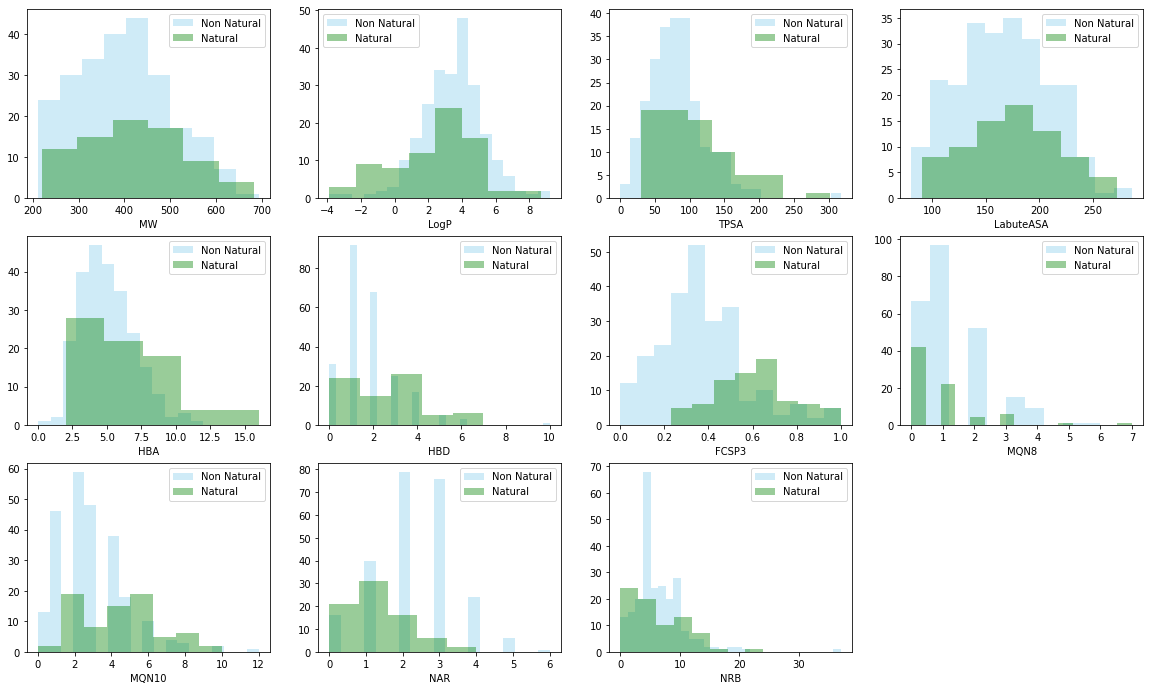

In [42]:
#Pour regarder tous les descripteurs :

plt.figure(figsize=(20, 16))

j=1
for i in df_PCA.iloc[:, 3:].columns:
    plt.subplot(4, 4, j)
    sns.distplot(df_PCA[df_PCA['natural_product'] == '0'][i] , color="skyblue", label="Non Natural", kde=False)
    sns.distplot(df_PCA[df_PCA['natural_product'] == '1'][i] , color="green", label="Natural", kde=False)
    plt.legend()
    j += 1


In [43]:
#Matrice de corrélation
df_PCA.corr()

,MW,LogP,TPSA,LabuteASA,HBA,HBD,FCSP3,MQN8,MQN10,NAR,NRB
MW,1.000000,0.359521,0.452450,0.980062,0.561417,0.189812,-0.006953,0.186963,0.443247,0.376293,0.496977
LogP,0.359521,1.000000,-0.528681,0.419578,-0.361767,-0.510750,-0.106204,-0.269431,-0.321394,0.314197,0.167179
TPSA,0.452450,-0.528681,1.000000,0.385704,0.804565,0.722662,-0.029442,0.519983,0.742238,0.090495,0.309041
LabuteASA,0.980062,0.419578,0.385704,1.000000,0.509746,0.151885,0.003770,0.169105,0.388596,0.383524,0.502924
HBA,0.561417,-0.361767,0.804565,0.509746,1.000000,0.380308,-0.022404,0.310403,0.611059,0.243134,0.336820
HBD,0.189812,-0.510750,0.722662,0.151885,0.380308,1.000000,0.046633,0.513143,0.461032,-0.079675,0.199290
FCSP3,-0.006953,-0.106204,-0.029442,0.003770,-0.022404,0.046633,1.000000,-0.206889,0.211957,-0.757421,0.218829
MQN8,0.186963,-0.269431,0.519983,0.169105,0.310403,0.513143,-0.206889,1.000000,0.136114,0.116114,0.199157
MQN10,0.443247,-0.321394,0.742238,0.388596,0.611059,0.461032,0.211957,0.136114,1.000000,-0.197495,0.516191
NAR,0.376293,0.314197,0.090495,0.383524,0.243134,-0.079675,-0.757421,0.116114,-0.197495,1.000000,0.003577


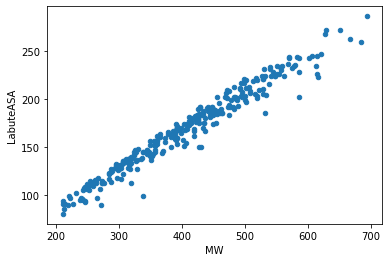

In [44]:
#Visualiser la distributions des données en fonction des deux variables les mieux correlées 
df_PCA.plot.scatter(x='MW', y='LabuteASA');

## Début de l'ACP

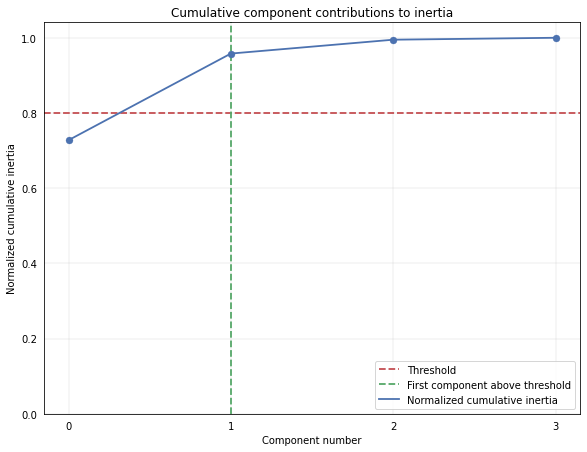

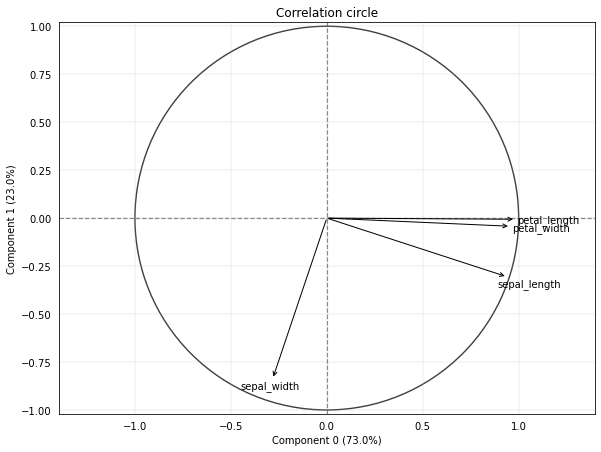

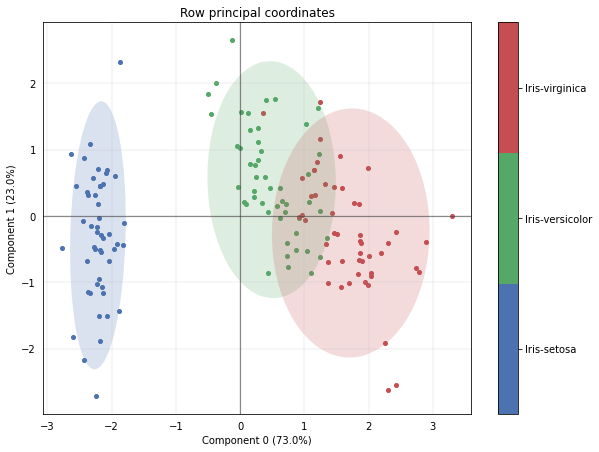

In [45]:
#Demonstration avec un exemple classique 

df = pd.read_csv('https://raw.githubusercontent.com/kormilitzin/Prince/master/examples/data/iris.csv')

pca = prince.PCA(df, n_components=4)

fig1, ax1 = pca.plot_cumulative_inertia()
fig2, ax2 = pca.plot_correlation_circle()
fig3, ax3 = pca.plot_rows(axes=[0,1], color_by='class', ellipse_fill=True)

plt.show()

In [46]:
df_PCA2 = df_PCA.copy() #On prend une copie car Prince effectue des changements sur le DF
pca1 = prince.PCA(df_PCA2, n_components=4)

In [47]:
pca1.X.head() #= valeurs standardisées des descripteurs (DF)

,MW,LogP,TPSA,LabuteASA,HBA,HBD,FCSP3,MQN8,MQN10,NAR,NRB
58,-0.139618,-1.047413,0.789689,-0.215856,1.045315,0.022450,0.079200,0.773937,0.387584,-0.028270,-0.316304
105,-1.296076,-0.185882,-0.968061,-1.184141,-0.907741,0.022450,-0.603683,-0.965370,-0.586738,-0.028270,-1.475112
143,-0.413566,0.149157,-0.212206,-0.265330,-0.907741,0.671445,1.157506,-0.965370,0.387584,-1.662777,0.378981
183,-1.324513,-0.329471,-0.198907,-1.304293,-0.907741,0.671445,0.007094,0.773937,-0.099577,-0.845523,0.378981
202,-0.053358,0.053432,-0.225506,0.043296,-0.907741,0.671445,-0.287883,0.773937,-0.586738,-0.028270,0.147220


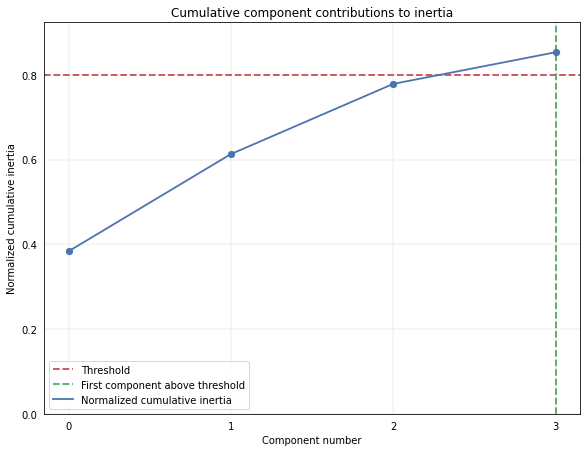

In [48]:
#Les fonctions pour représenter l'ACP sont incluses dans le package. 
fig1, ax1 = pca1.plot_cumulative_inertia()
plt.show()

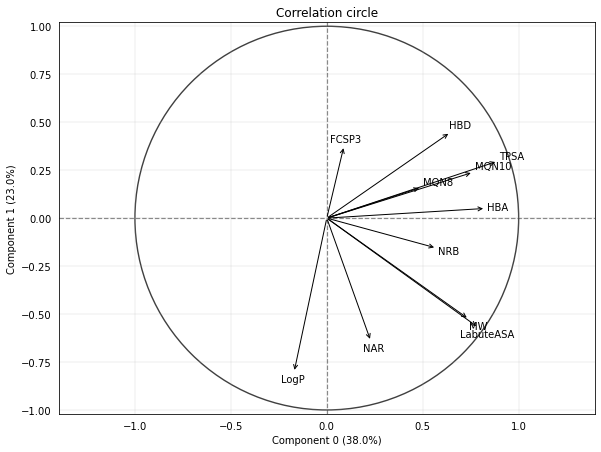

In [49]:
#Le cercle des corrélations
fig2, ax2 = pca1.plot_correlation_circle()
plt.show()

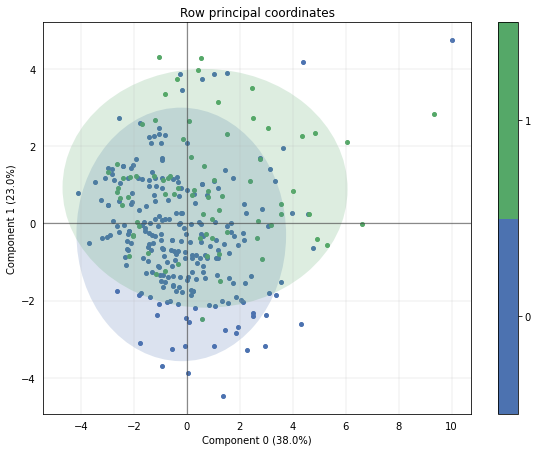

In [50]:
fig2, ax2 = pca1.plot_rows(axes=[0,1], color_by='natural_product', ellipse_fill=True)
plt.show()

In [51]:
#Corrélation des variables avec les composantes :
pca1.column_correlations

,0,1,2,3
MW,0.741244,-0.576901,0.201489,0.034119
LogP,-0.239985,-0.853353,0.291138,0.204660
TPSA,0.898243,0.305465,-0.201103,-0.103588
LabuteASA,0.696523,-0.620920,0.225644,0.074206
HBA,0.835488,0.038694,-0.113699,-0.334845
HBD,0.636809,0.466275,-0.208597,0.277062
FCSP3,0.016367,0.395436,0.828105,0.128671
MQN8,0.501074,0.172983,-0.435130,0.650556
MQN10,0.770845,0.255696,0.296190,-0.309022
NAR,0.186393,-0.691326,-0.618130,-0.146768


In [52]:
# Pour obtenir le cos2 des variables 
cos2 = np.square(pca1.column_correlations)
cos2

,0,1,2,3
MW,0.549442,0.332815,0.040598,0.001164
LogP,0.057593,0.728212,0.084761,0.041886
TPSA,0.806841,0.093309,0.040442,0.010731
LabuteASA,0.485145,0.385542,0.050915,0.005506
HBA,0.698039,0.001497,0.012927,0.112121
HBD,0.405526,0.217412,0.043513,0.076763
FCSP3,0.000268,0.156370,0.685758,0.016556
MQN8,0.251076,0.029923,0.189338,0.423223
MQN10,0.594202,0.065381,0.087729,0.095495
NAR,0.034742,0.477932,0.382085,0.021541


In [53]:
# Pour obtenir les contributions de chaque variable, il faut diviser le cos2 par la somme totale des cos2
contrib  = (cos2*100) / cos2.sum()
contrib

,0,1,2,3
MW,13.022635,13.185297,2.225261,0.138918
LogP,1.365036,28.849911,4.645951,4.998394
TPSA,19.123387,3.696673,2.216732,1.280514
LabuteASA,11.498690,15.274205,2.790787,0.657109
HBA,16.544622,0.059317,0.708580,13.379866
HBD,9.611591,8.613313,2.385024,9.160468
FCSP3,0.006349,6.194968,37.587945,1.975707
MQN8,5.950883,1.185485,10.378073,50.504766
MQN10,14.083510,2.590216,4.808606,11.395758
NAR,0.823446,18.934465,20.942964,2.570553


In [56]:
pca1.plot_correlation_circle?

In [54]:
fig, ax = pca1.plot_correlation_circle()
plt.show()

TypeError: plot_correlation_circle() got an unexpected keyword argument 'color_by'

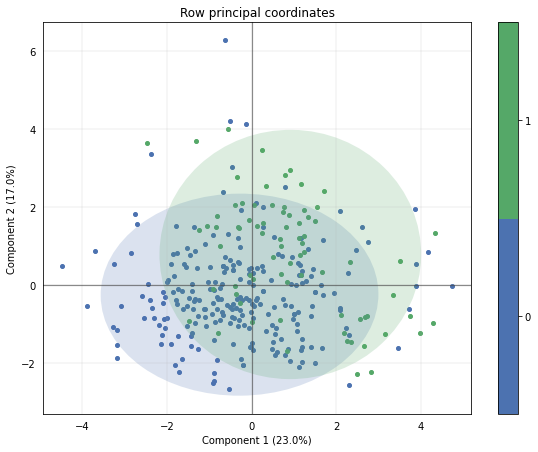

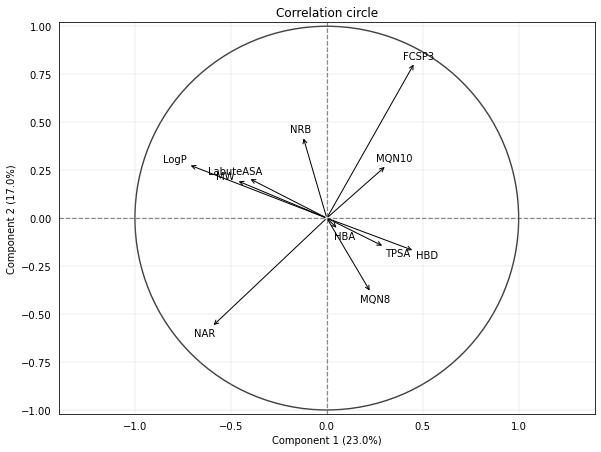

In [129]:
## On peut aussi visualiser la distributions des données en fontion des autres composantes

fig1, ax1 = pca1.plot_rows(axes=[1,2], color_by='natural_product', ellipse_fill=True)
fig2, ax2 =pca1.plot_correlation_circle(axes=[1,2])

plt.show()


Populating the interactive namespace from numpy and matplotlib


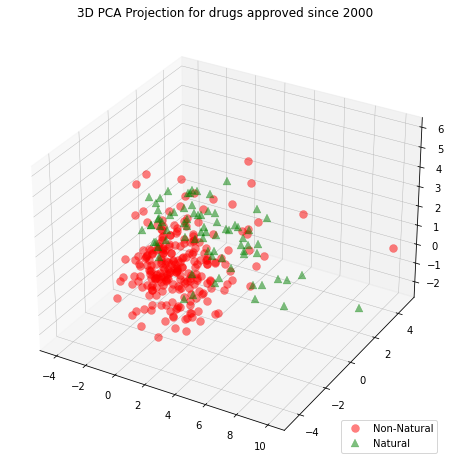

In [72]:
#Possible de représenter en 3D

#Besoin des indexes pour chaque catégorie
non_nat = pca1.categorical_columns[pca1.categorical_columns.natural_product == '0'].index
nat = pca1.categorical_columns[pca1.categorical_columns.natural_product == '1'].index


%pylab inline
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10   
ax.plot(pca1.row_principal_coordinates[0][non_nat], pca1.row_principal_coordinates[1][non_nat], pca1.row_principal_coordinates[2][non_nat], 'o', markersize=8, color='red', alpha=0.5, label='Non-Natural')
ax.plot(pca1.row_principal_coordinates[0][nat], pca1.row_principal_coordinates[1][nat], pca1.row_principal_coordinates[2][nat], '^', markersize=8, alpha=0.5, color='green', label='Natural')

plt.title('3D PCA Projection for drugs approved since 2000')
ax.legend(loc='lower right')

plt.show();

In [73]:
#Contribution de chaque valeur dans les composantes
pca1.row_component_contributions

,0,1,2,3
58,0.000778,1.518696e-03,8.093064e-04,3.450157e-04
105,0.004722,5.571113e-04,1.371470e-03,1.884956e-03
143,0.000303,1.881702e-03,6.274159e-03,1.314310e-04
183,0.000673,3.576612e-03,1.197291e-04,5.718150e-03
202,0.000053,2.330812e-07,4.233139e-04,5.981934e-03
217,0.000197,3.157819e-03,5.022862e-04,2.508997e-03
219,0.006702,2.532724e-03,4.933589e-04,1.797540e-03
224,0.000087,8.394795e-04,1.458348e-04,6.623147e-04
225,0.003834,1.335107e-02,1.951189e-03,5.064752e-04
235,0.000832,5.477688e-03,3.753178e-04,3.302906e-04


In [74]:
# df_PCA.columns

Index(['ID', 'natural_product', 'ROMol', 'MW', 'LogP', 'TPSA', 'LabuteASA',
       'HBA', 'HBD', 'FCSP3', 'MQN8', 'MQN10', 'NAR', 'NRB'],
      dtype='object')

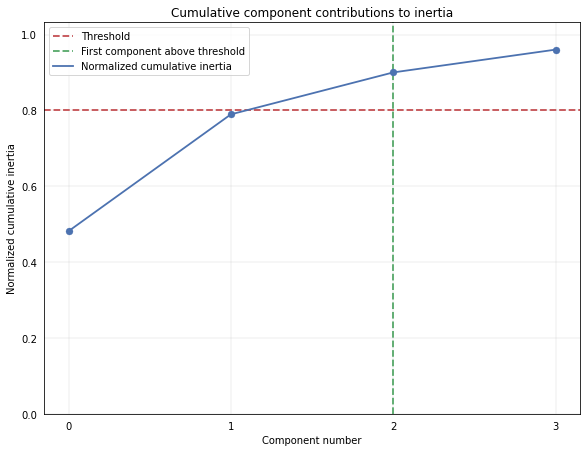

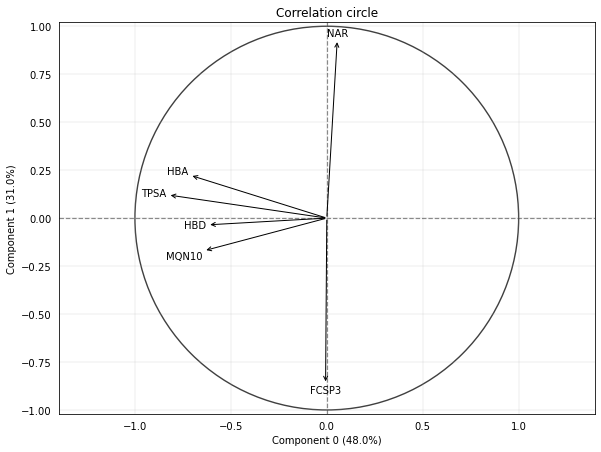

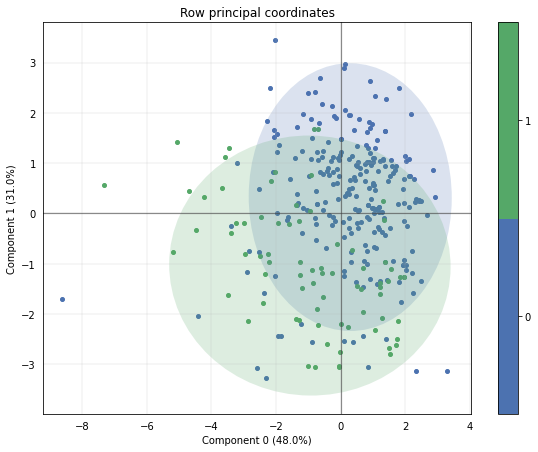

In [75]:
df_PCA_save=df_PCA
df_PCA_new=df_PCA[['ID', 'natural_product', 'TPSA', 'HBA', 'HBD', 'FCSP3', 'MQN10', 'NAR']]
df_PCA2 = df_PCA_new.copy()
pca1 = prince.PCA(df_PCA2, n_components=4)

fig1, ax1 = pca1.plot_cumulative_inertia()
fig2, ax2 = pca1.plot_correlation_circle()
fig3, ax3 = pca1.plot_rows(axes=[0,1], color_by='natural_product', ellipse_fill=True)

plt.show()

### Can we separate methods of administration

In [76]:
df_meds.head()

,ID,ROMol,availability_type,chirality,first_approval,first_in_class,inorganic_flag,molecule_type,natural_product,oral,parenteral,pref_name,topical,Mixture
58,CHEMBL430,,1,0,2003.0,0,0,Small molecule,0,True,False,GEMIFLOXACIN,False,1
105,CHEMBL53,,1,1,2004.0,0,0,Small molecule,1,False,True,APOMORPHINE,False,1
143,CHEMBL494,,1,0,2004.0,0,0,Small molecule,1,False,False,ILOPROST,True,1
183,CHEMBL98,,1,2,2006.0,0,0,Small molecule,0,True,False,VORINOSTAT,False,1
202,CHEMBL535,,1,2,2006.0,0,0,Small molecule,0,True,False,SUNITINIB,False,1


In [77]:
Ladm=[]
for a,b in df_meds[['oral', 'parenteral', 'topical']].iterrows():
    oral = b[0]
    parenteral = b[1]
    topical = b[2]
    if oral == 'True' and parenteral == 'False' and topical == 'False' :
        Ladm.append('O')
    elif parenteral == 'True' and oral == 'False' and topical == 'False' :
        Ladm.append('P')
    elif topical == 'True' and parenteral == 'False' and oral == 'False':
        Ladm.append('T')
    else :
        Ladm.append('M')


len(Ladm)

383

In [78]:
df_meds['Administration'] = Ladm
df_meds = df_meds[df_meds['Administration'] != 'M']

df_meds.head()

,ID,ROMol,availability_type,chirality,first_approval,first_in_class,inorganic_flag,molecule_type,natural_product,oral,parenteral,pref_name,topical,Mixture,Administration
58,CHEMBL430,,1,0,2003.0,0,0,Small molecule,0,True,False,GEMIFLOXACIN,False,1,O
105,CHEMBL53,,1,1,2004.0,0,0,Small molecule,1,False,True,APOMORPHINE,False,1,P
143,CHEMBL494,,1,0,2004.0,0,0,Small molecule,1,False,False,ILOPROST,True,1,T
183,CHEMBL98,,1,2,2006.0,0,0,Small molecule,0,True,False,VORINOSTAT,False,1,O
202,CHEMBL535,,1,2,2006.0,0,0,Small molecule,0,True,False,SUNITINIB,False,1,O


In [82]:
df_PCA = df_meds[['ROMol', 'Administration']]
# df_PCA['MW'] = df_PCA.ROMol.map(lambda m: round(Chem.Descriptors.ExactMolWt(m), 1))
# df_PCA['LogP'] = df_PCA.ROMol.map(lambda m: round(Chem.Descriptors.MolLogP(m), 1))
# df_PCA['TPSA'] = df_PCA.ROMol.map(lambda m: round(Chem.Descriptors.TPSA(m), 1))
# df_PCA['HBA'] = df_PCA.ROMol.map(lambda m: Chem.Descriptors.NumHAcceptors(m))
# df_PCA['HBD'] = df_PCA.ROMol.map(lambda m: Chem.Descriptors.NumHDonors(m))
# df_PCA['FCSP3'] = df_PCA.ROMol.map(lambda m: Lipinski.FractionCSP3(m))
# df_PCA['MQN10'] = df_PCA.ROMol.map(lambda m: rdMolDescriptors.MQNs_(m)[9])
# df_PCA['NAR'] = df_PCA.ROMol.map(lambda m: Lipinski.NumAromaticRings(m))
# df_PCA['NRB'] = df_PCA.ROMol.map(lambda m: Chem.Descriptors.NumRotatableBonds(m))
# df_PCA['Chi0'] = df_PCA.ROMol.map(lambda m: Chem.Descriptors.Chi0(m))
# df_PCA['Bertz'] = df_PCA.ROMol.map(lambda m: Chem.Descriptors.BertzCT(m))
# df_PCA['ES'] = df_PCA.ROMol.map(lambda m: Chem.Descriptors.Chi1(m))
# df_PCA['FP'] = df_PCA.ROMol.map(lambda m: Chem.Descriptors.Kappa1(m))
# df_PCA['FP1'] = df_PCA.ROMol.map(lambda m: Chem.Descriptors.Kappa2(m))
# df_PCA['FP2'] = df_PCA.ROMol.map(lambda m: Chem.Descriptors.Kappa3(m))

df_PCA['FCSP3'] = df_PCA.ROMol.map(lambda m: Lipinski.FractionCSP3(m))
df_PCA['NAR'] = df_PCA.ROMol.map(lambda m: Lipinski.NumAromaticRings(m))
df_PCA['Chi0'] = df_PCA.ROMol.map(lambda m: Chem.Descriptors.Chi0(m))
df_PCA['LogP'] = df_PCA.ROMol.map(lambda m: round(Chem.Descriptors.MolLogP(m), 1))
df_PCA['TPSA'] = df_PCA.ROMol.map(lambda m: round(Chem.Descriptors.TPSA(m), 1))
df_PCA['HBA'] = df_PCA.ROMol.map(lambda m: Chem.Descriptors.NumHAcceptors(m))
df_PCA['Bertz'] = df_PCA.ROMol.map(lambda m: Chem.Descriptors.BertzCT(m))
len(df_PCA)

/home/pierre-yvesad/anaconda3/envs/test_teachopencadd/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/pierre-yvesad/anaconda3/envs/test_teachopencadd/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/pierre-yvesad/anaconda3/envs/test_teachopencadd/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

351

In [83]:
df_PCA2=df_PCA.copy()
df_PCA2['Administration'].value_counts()

O    231
P     66
T     54
Name: Administration, dtype: int64

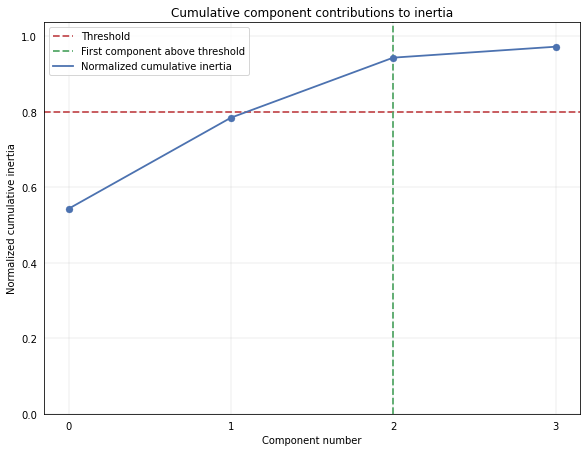

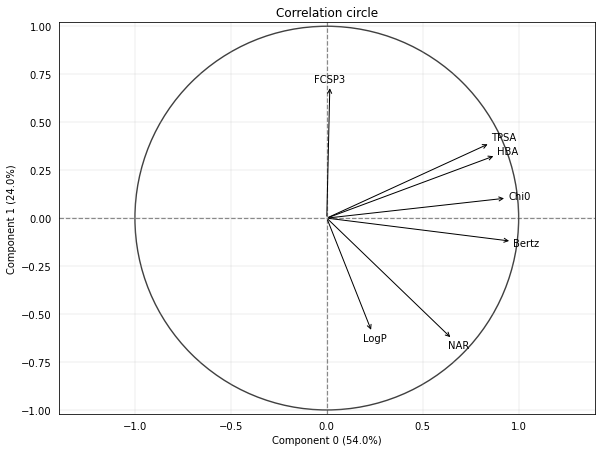

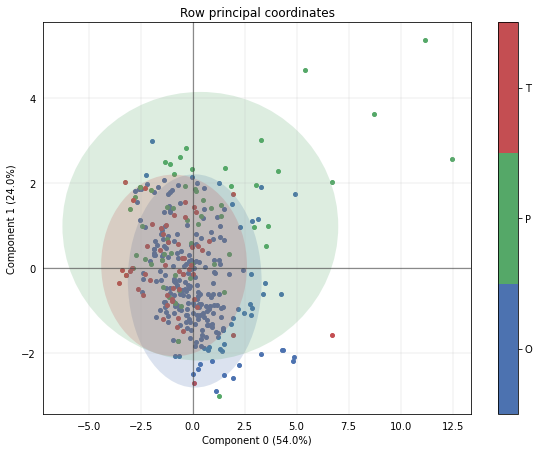

In [84]:
#df_PCA2['oral'] = df_PCA2['oral'].astype('category
df_PCA2=df_PCA.copy()
pca1 = prince.PCA(df_PCA2, n_components=4)

fig1, ax1 = pca1.plot_cumulative_inertia()
fig2, ax2 = pca1.plot_correlation_circle()
fig3, ax3 = pca1.plot_rows(axes=[0,1], color_by='Administration', ellipse_fill=True)

plt.show()

### ACP sur un autre dataset (facultatif)

,ID,ROMol,cat
0,,,ST
1,,,ST
2,,,ST
3,,,ST
4,,,ST

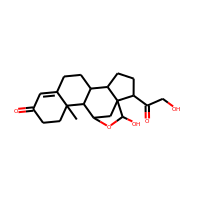
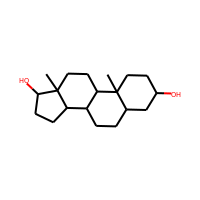
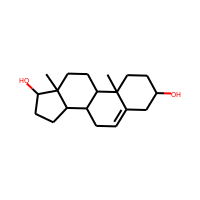
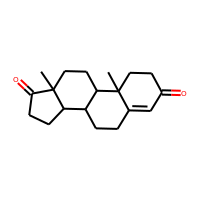
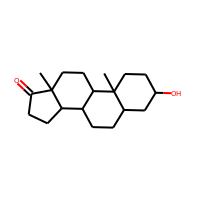

In [50]:
#Charger le dataset mix.sdf 
df_mix = PandasTools.LoadSDF('./data/mix.sdf', 
                             isomericSmiles=True)
df_mix.head()

In [55]:
df_mix['cat'].value_counts()

TH    72
Fr    50
BZ    37
ST    31
Name: cat, dtype: int64

In [56]:
#Calculer les descripteurs pour chaque molécule 
df_mix['MW'] = df_mix.ROMol.map(lambda m: round(Chem.Descriptors.ExactMolWt(m), 1))
df_mix['LogP'] = df_mix.ROMol.map(lambda m: round(Chem.Descriptors.MolLogP(m), 1))
df_mix['TPSA'] = df_mix.ROMol.map(lambda m: round(Chem.Descriptors.TPSA(m), 1))
df_mix['LabuteASA'] = df_mix.ROMol.map(lambda m: round(Chem.Descriptors.LabuteASA(m), 1))
df_mix['HBA'] = df_mix.ROMol.map(lambda m: Chem.Descriptors.NumHAcceptors(m))
df_mix['HBD'] = df_mix.ROMol.map(lambda m: Chem.Descriptors.NumHDonors(m))
df_mix['FCSP3'] = df_mix.ROMol.map(lambda m: Lipinski.FractionCSP3(m))
df_mix['MQN8'] = df_mix.ROMol.map(lambda m: rdMolDescriptors.MQNs_(m)[7])
df_mix['MQN10'] = df_mix.ROMol.map(lambda m: rdMolDescriptors.MQNs_(m)[9])
df_mix['NAR'] = df_mix.ROMol.map(lambda m: Lipinski.NumAromaticRings(m))
df_mix['NRB'] = df_mix.ROMol.map(lambda m: Chem.Descriptors.NumRotatableBonds(m))

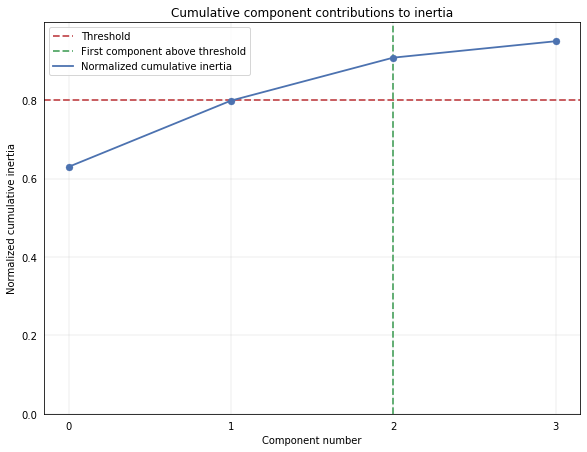

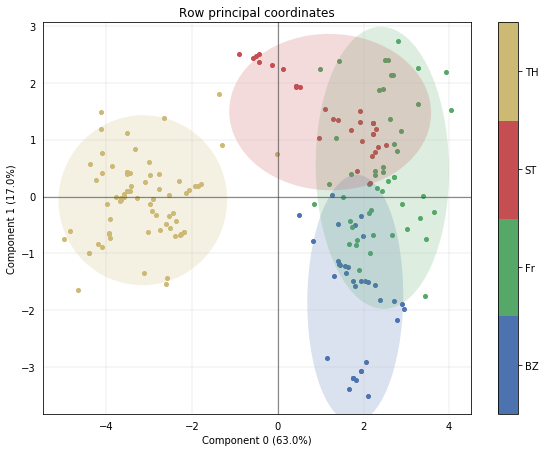

In [59]:
df_mix2=df_mix.copy()
pca_mix = prince.PCA(df_mix2, n_components=4)

fig1, ax1 = pca_mix.plot_cumulative_inertia()
fig2, ax2 = pca_mix.plot_rows(axes=[0,1], color_by='cat', ellipse_fill=True)

plt.show()

### Examen?

In [ ]:
test = PandasTools.LoadSDF('/home/bournez/Bureau/steroids.sdf', idName=None)
test['cat']=['ST' for x in test.ROMol]
for mol in test.ROMol:
    Chem.AllChem.Compute2DCoords(mol)
    mol.SetProp('_Name', '')
test.head()

In [ ]:
test2= PandasTools.LoadSDF('/home/bournez/Bureau/thrombin.sdf')
for mol in test2.ROMol:
    Chem.AllChem.Compute2DCoords(mol)
test2['cat']=['TH' for x in test2.ROMol]

test2.head()


In [ ]:
test3 = PandasTools.LoadSDF('/home/bournez/Bureau/benzo.sdf')
test3['cat']=['BZ' for x in test3.ROMol]
test3.head()

In [ ]:
test4 = PandasTools.LoadSDF('/home/bournez/Téléchargements/chbrbb-interesting.sdf')
test4=test4.sample(50)
test4['cat']=['Fr' for x in test4.ROMol]
test4.head()

In [ ]:
alls=pd.concat([test[['ROMol', 'cat']], test2[['ROMol', 'cat']], test3[['ROMol', 'cat']], test4[['ROMol', 'cat']]], ignore_index=True)
len(alls)

In [ ]:
test.EXACT_MASS = test.EXACT_MASS.astype(float)
test = test[test.EXACT_MASS.between(200, 700)]
len(test)

In [ ]:
test['Toxin'] = ['1' for x in test['EXACT_MASS']]
test.head()

In [ ]:
df_PCA['Toxin'] = ['0' for x in df_PCA['ID']]
df_PCA.head()

In [ ]:
# df_PCA_t = df_PCA[['ROMol', 'Toxin']]
# test_t = test[['ROMol', 'Toxin']].sample(300)

#alls = pd.concat([test_t, df_PCA_t])
#alls = df_PCA

alls['MW'] = alls.ROMol.map(lambda m: round(Chem.Descriptors.ExactMolWt(m), 1))
alls['LogP'] = alls.ROMol.map(lambda m: round(Chem.Descriptors.MolLogP(m), 1))
alls['TPSA'] = alls.ROMol.map(lambda m: round(Chem.Descriptors.TPSA(m), 1))
alls['LabuteASA'] = alls.ROMol.map(lambda m: round(Chem.Descriptors.LabuteASA(m), 1))
alls['HBA'] = alls.ROMol.map(lambda m: Chem.Descriptors.NumHAcceptors(m))
alls['HBD'] = alls.ROMol.map(lambda m: Chem.Descriptors.NumHDonors(m))
alls['FCSP3'] = alls.ROMol.map(lambda m: Lipinski.FractionCSP3(m))
alls['MQN8'] = alls.ROMol.map(lambda m: rdMolDescriptors.MQNs_(m)[7])
alls['MQN10'] = alls.ROMol.map(lambda m: rdMolDescriptors.MQNs_(m)[9])
alls['NAR'] = alls.ROMol.map(lambda m: Lipinski.NumAromaticRings(m))
alls['NRB'] = alls.ROMol.map(lambda m: Chem.Descriptors.NumRotatableBonds(m))
alls['Chi'] = alls.ROMol.map(lambda m: Chem.Descriptors.Chi0(m))

In [ ]:
#df_PCA2['oral'] = df_PCA2['oral'].astype('category
df_PCA2=alls.copy()
pca1 = prince.PCA(df_PCA2, n_components=4)

fig1, ax1 = pca1.plot_cumulative_inertia()
fig2, ax2 = pca1.plot_rows(color_by='cat', ellipse_fill=True)
#fig3, ax3 = pca1.plot_rows(axes=[1,2], color_by='Administration', ellipse_fill=True)

plt.show()

In [ ]:
PandasTools.WriteSDF(alls, '/home/bournez/Bureau/exam.sdf', properties=['cat'])

In [ ]:
PandasTools.LoadSDF('/home/bournez/Bureau/exam.sdf')

In [ ]:
#Pour regarder tous les descripteurs :
plt.figure(figsize=(20, 16))

j=1
for i in alls.iloc[:, 2:].columns:
    plt.subplot(4, 4, j)
    sns.distplot(alls[alls['Toxin'] == '0'][i] , color="skyblue", label="Non toxic", kde=False)
    sns.distplot(alls[alls['Toxin'] == '1'][i] , color="red", label="Toxic", kde=False)
    plt.legend()
    j += 1

### With Scikit-Learn

In [52]:
# split data table into data X and class labels y
X = df_PCA_save.iloc[:, 3:].values
y = df_PCA_save.iloc[:, 1].values

from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

Reduced dataset shape: (318, 4)


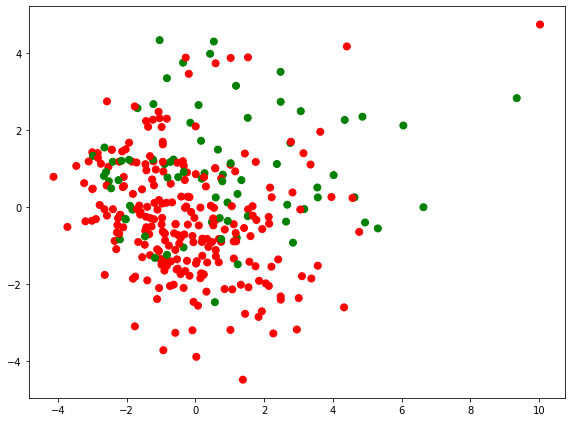

In [53]:
def color(x):
    if x == '0' :
        return('red')
    else :
        return'green'

from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca.fit(X_std)
X_reduced = pca.transform(X_std)
print("Reduced dataset shape:", X_reduced.shape)

import pylab as pl
pl.scatter(X_reduced[:, 0], X_reduced[:, 1], c=[color(x) for x in df_PCA_save.natural_product],
           cmap='RdYlBu')



In [54]:
#Contribution dezs variables
pca.components_.T * np.sqrt(pca.explained_variance_)

array([[ 0.74243666, -0.57707712,  0.20505678, -0.00976283],
       [-0.24039319, -0.85478299,  0.29073903,  0.21386412],
       [ 0.89966995,  0.30590956, -0.20082337, -0.11215916],
       [ 0.69764411, -0.62117369,  0.22911243,  0.02976639],
       [ 0.83685497,  0.03958441, -0.1092225 , -0.36989802],
       [ 0.63779762,  0.46641946, -0.21136101,  0.2701966 ],
       [ 0.01647188,  0.3977343 ,  0.83216493,  0.07444928],
       [ 0.50181645,  0.17203182, -0.43990231,  0.64017438],
       [ 0.77204637,  0.25593799,  0.29430313, -0.24773825],
       [ 0.18665472, -0.69304842, -0.61772875, -0.14206298],
       [ 0.580714  , -0.19049474,  0.44742161,  0.2950259 ]])

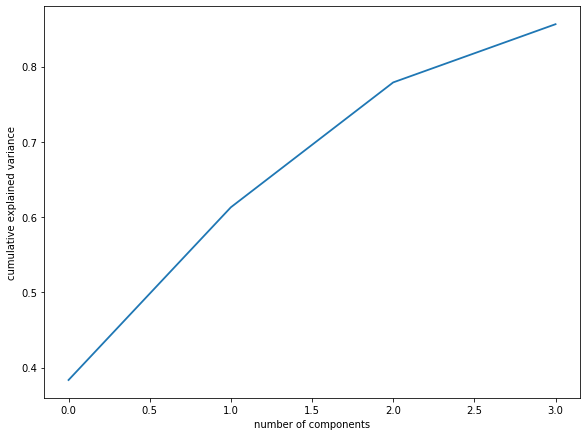

In [55]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [56]:
#Covariance matrix
import numpy as np
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00315457  0.36065547  0.45387728  0.98315361  0.56318785  0.19041065
  -0.00697496  0.18755237  0.44464537  0.37747969  0.49854506]
 [ 0.36065547  1.00315457 -0.5303484   0.42090109 -0.36290779 -0.51236137
  -0.10653895 -0.27028058 -0.32240752  0.31518804  0.16770606]
 [ 0.45387728 -0.5303484   1.00315457  0.38692041  0.80710326  0.72494217
  -0.02953478  0.52162316  0.74457972  0.09078047  0.31001603]
 [ 0.98315361  0.42090109  0.38692041  1.00315457  0.51135378  0.15236402
   0.00378151  0.16963817  0.38982181  0.38473342  0.50451056]
 [ 0.56318785 -0.36290779  0.80710326  0.51135378  1.00315457  0.38150752
  -0.02247454  0.3113817   0.61298682  0.2439013   0.33788286]
 [ 0.19041065 -0.51236137  0.72494217  0.15236402  0.38150752  1.00315457
   0.04678011  0.51476216  0.46248628 -0.07992675  0.19991915]
 [-0.00697496 -0.10653895 -0.02953478  0.00378151 -0.02247454  0.04678011
   1.00315457 -0.2075417   0.21262567 -0.7598106   0.2195193 ]
 [ 0.18755237 -0.27028

In [57]:
cor_mat1 = np.corrcoef(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cor_mat1)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.36088091  0.3626534  -0.15156557 -0.01057007  0.30563526 -0.04327739
   0.07996522  0.70434755 -0.10511127  0.32281566  0.04603862]
 [-0.11684944  0.53717249 -0.21489671  0.23154745  0.02842945 -0.17181303
   0.20466093  0.0103513  -0.02619953 -0.71480983  0.11847529]
 [ 0.43730829 -0.19224318  0.14843649 -0.12143302  0.0473097  -0.03507706
   0.09381855 -0.090111   -0.74277908 -0.28430759 -0.28650054]
 [ 0.33910831  0.39036507 -0.16934606  0.03222762  0.31205813 -0.0408884
   0.03544685 -0.70163754  0.0281551   0.32788194  0.04473055]
 [ 0.40677542 -0.02487609  0.08073067 -0.40048299  0.05403722  0.47792375
  -0.21448874  0.00822321  0.23261655 -0.3445632   0.46558827]
 [ 0.31001834 -0.29311265  0.15622528  0.29253777  0.18687907 -0.65675477
  -0.36539917  0.02589342  0.19960874 -0.13228575  0.22407167]
 [ 0.00800659 -0.24994873 -0.615086    0.08060511  0.35070137  0.21091046
  -0.32277191  0.03177821  0.15471953 -0.19020274 -0.4688839 ]
 [ 0.24392112 -0.1081102   0

In [58]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
4.219132268510277
2.5241568964532344
1.8246487882002767
0.8504093035772236
0.5715613876961664
0.4444678178055337
0.3022554980034664
0.11088943768296308
0.0885266472072409
0.04759733997298229
0.016354614890633463


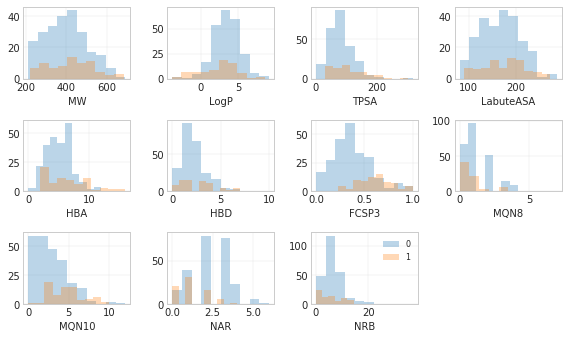

In [59]:
from matplotlib import pyplot as plt
import numpy as np
import math

label_dict = {1: '0',
              2: '1'}

feature_dict = {0: 'MW',
                1: 'LogP',
                2: 'TPSA',
                3: 'LabuteASA',
                4: 'HBA',
                5 : 'HBD', 
                6: 'FCSP3',
                7:'MQN8',
                8:'MQN10', 
                9:'NAR',
                10:'NRB'}

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(8, 6))
    for cnt in range(11):
        plt.subplot(4, 4, cnt+1)
        for lab in ('0', '1'):
            plt.hist(X[y==lab, cnt],
                     label=lab,
                     bins=10,
                     alpha=0.3,)
        plt.xlabel(feature_dict[cnt])
    plt.legend(loc='upper right', fancybox=True, fontsize=8)

    plt.tight_layout()
    plt.show()